# Introduction to matplotlib :

Right so now that you know how to arrange data like you want it to using pandas, and you also know how to perform complex operations on that data using numpy, that does seem to be more than enough right? 

But let us say you do use pandas and numpy to calculate and derive inferences from your data, how do you see or visualize the data that you have just created? This is exactly where matplotlib comes in.

Being the litteral crunchedup version of mathematical plotting library, matplot lib is the go to industry standard library to display your results in a visual format.

From genreating barcharts to visualizing clusters, matplot lib is a powerfull library that is used for data visualization.



*Though this document is not a complete and intensive guide to matplotlib, understand that that is the purpose. For minute and fine details, you can read the documentation. The purpose of this file is to simple expose you to the possibilities of this library and provide a breif overview of what all is possible using matplotlib*

###  **0. Importing matplotlib**
Just like any other library, to begin using matplotlib, you first need to import it.


In [1]:
import matplotlib as mplt
import numpy as np

Since we are working on a remote python notebook, we need not install the library on our local machine. 


However, the general method to do that is :

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\hp\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


The most commonly used sublibrary of matplotlib is pyplot. So for convenience, we import pyplot as follows:

In [3]:
import matplotlib.pyplot as plt

### **1. Plotting Data**

Now lets try plotting some data.

For a start lets plot an empty graph

[]

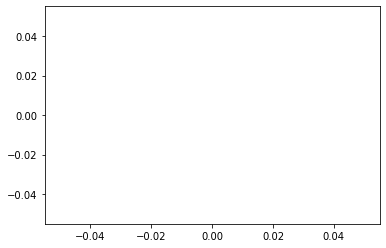

In [4]:
plt.plot()

Since we didn't pass any data into the function, nothing was plotted. 

Now lets try the sam thing with some data.

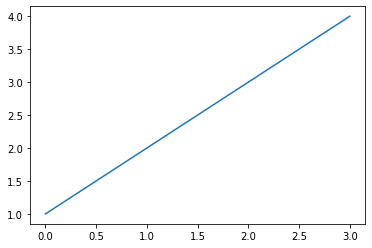

In [5]:
plt.plot([1, 2, 3, 4])

Without x and y coordinates provided separately, the function implicitly assumes that the data provided to it are the coordinates of the y axis while the presumed x axis coordinates are 0,1,2.....

Lets try this with some custom x and y coordinates

In [6]:
x = [1, 2, 3, 4]
y = [11, 44, 33, 22]

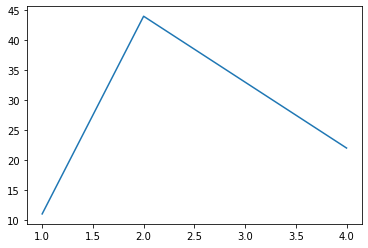

In [7]:
plt.plot(x, y)

Here, while x coordinates are in ascending order, y coordinates are not. 

Thus we can see that the plot function simply plots the coordinates and connects consecutive points with each other.

This can be seen more clearly below.

In [8]:
m = [10, 2, 3, 4]
n = [11, 44, 33, 22]

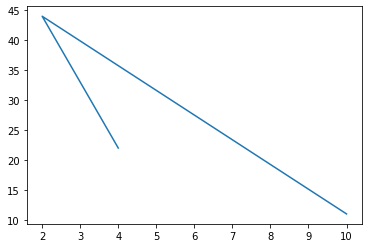

In [9]:
plt.plot(m,n)

A special feature of matplotlib is that it allows users to plot multiple graphsin a sinle plot, thus enabling us to locate cross-plot patters and correlations.

This is achieved through subplots.

An example is given below.:

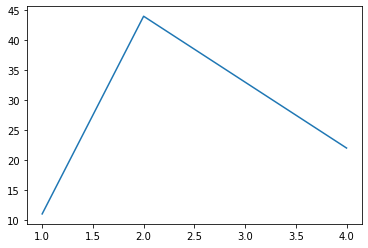

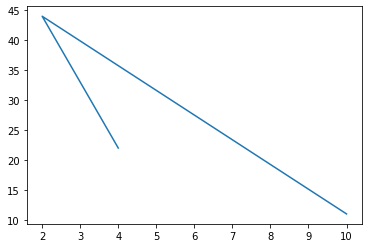

In [10]:
fig, ax = plt.subplots()
fig, bx = plt.subplots()
ax.plot(x, y)
bx.plot(m,n)

The locations of these subplots wrt one another can be manipluated by passing parameters to the subplots function.

TypeError: unsupported operand type(s) for /: 'list' and 'int'

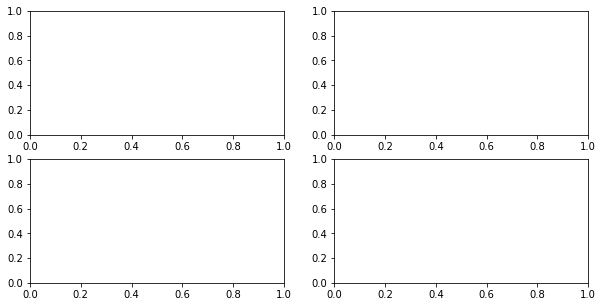

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, 
                                             ncols=2, 
                                             figsize=(10, 5))

# Plot data to each axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax4.hist(np.random.randn(1000));

### **2. Naming and saving plots**

Using matplotlib, graphs can be labled and saved as an image as follows:



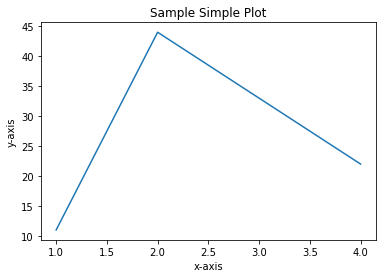

In [ ]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title="Sample Simple Plot", xlabel="x-axis", ylabel="y-axis")
fig.savefig("sample-plot.png")

### **3. General Matplotlib Plots :**



#### 3.1 Line :

Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.

In [ ]:
x = np.linspace(0, 10, 100)
# Calculate 100 evenly spaced numbers over the range of 0 to 10 both inclusive.
x=x[:16]
# Return the first 10

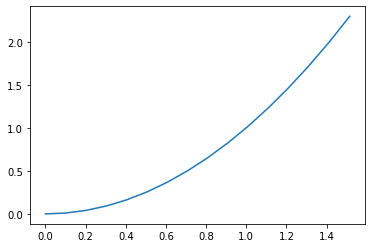

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, x**2)

#Try varying the values in the array x to see that the plotted graph is not smooth.

#### 3.2 Scatter :

A Scatter plot is simply a collection of points that have been plotted on the coordinate axis without connecting them with each other.

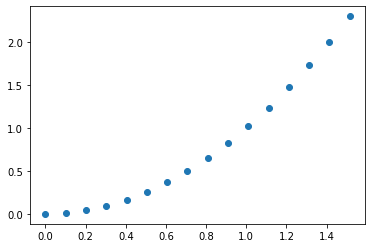

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, x**2)

#### 3.3 Bar :

Can be of two types:
*   Vertical
*   Horizontal




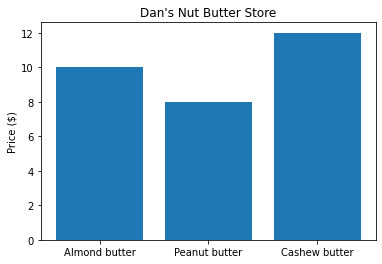

In [ ]:
nut_butter_prices = {"Almond butter": 10,
                     "Peanut butter": 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel="Price ($)")

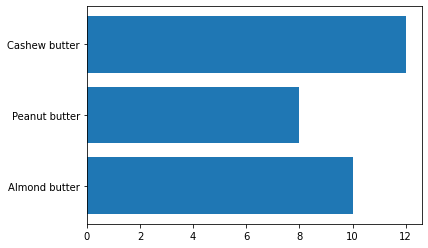

In [ ]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()))

#### 3.4 Histogram :

Histograms are generally used for plotting data that is present in continuous ranges. This includes plots like price ranges vs items sold or probability distribution functions, probability density functions, cumulative distributive fucntions, normal/poisson/exponential distributions etc etc


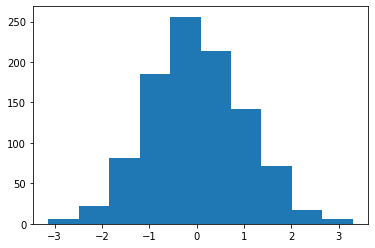

In [ ]:
x = np.random.randn(1000) 
# pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x)

(array([114., 108.,  97., 107., 100., 107.,  95.,  82.,  89., 101.]),
 array([0.00235439, 0.10209097, 0.20182754, 0.30156412, 0.4013007 ,
        0.50103728, 0.60077385, 0.70051043, 0.80024701, 0.89998359,
        0.99972016]),
 <BarContainer object of 10 artists>)

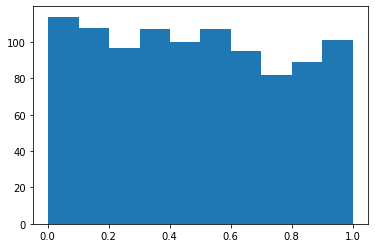

In [ ]:
x = np.random.random(1000) 
# random data from random distribution

fig, ax = plt.subplots()
ax.hist(x)